In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn

# TBP

In [2]:
fl_regions = pd.read_csv("C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\TBP Titrations\\TBP FL\\regions.csv")
fl_cond_frac = pd.read_csv("C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\TBP Titrations\\TBP FL\\condensed_fractions.csv")

In [32]:
condensed_fractions = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\TBP Titrations\\v2\\condensed_fractions.csv")

In [33]:
condensed_fractions["conc"] = 9 / condensed_fractions["dir_name"]

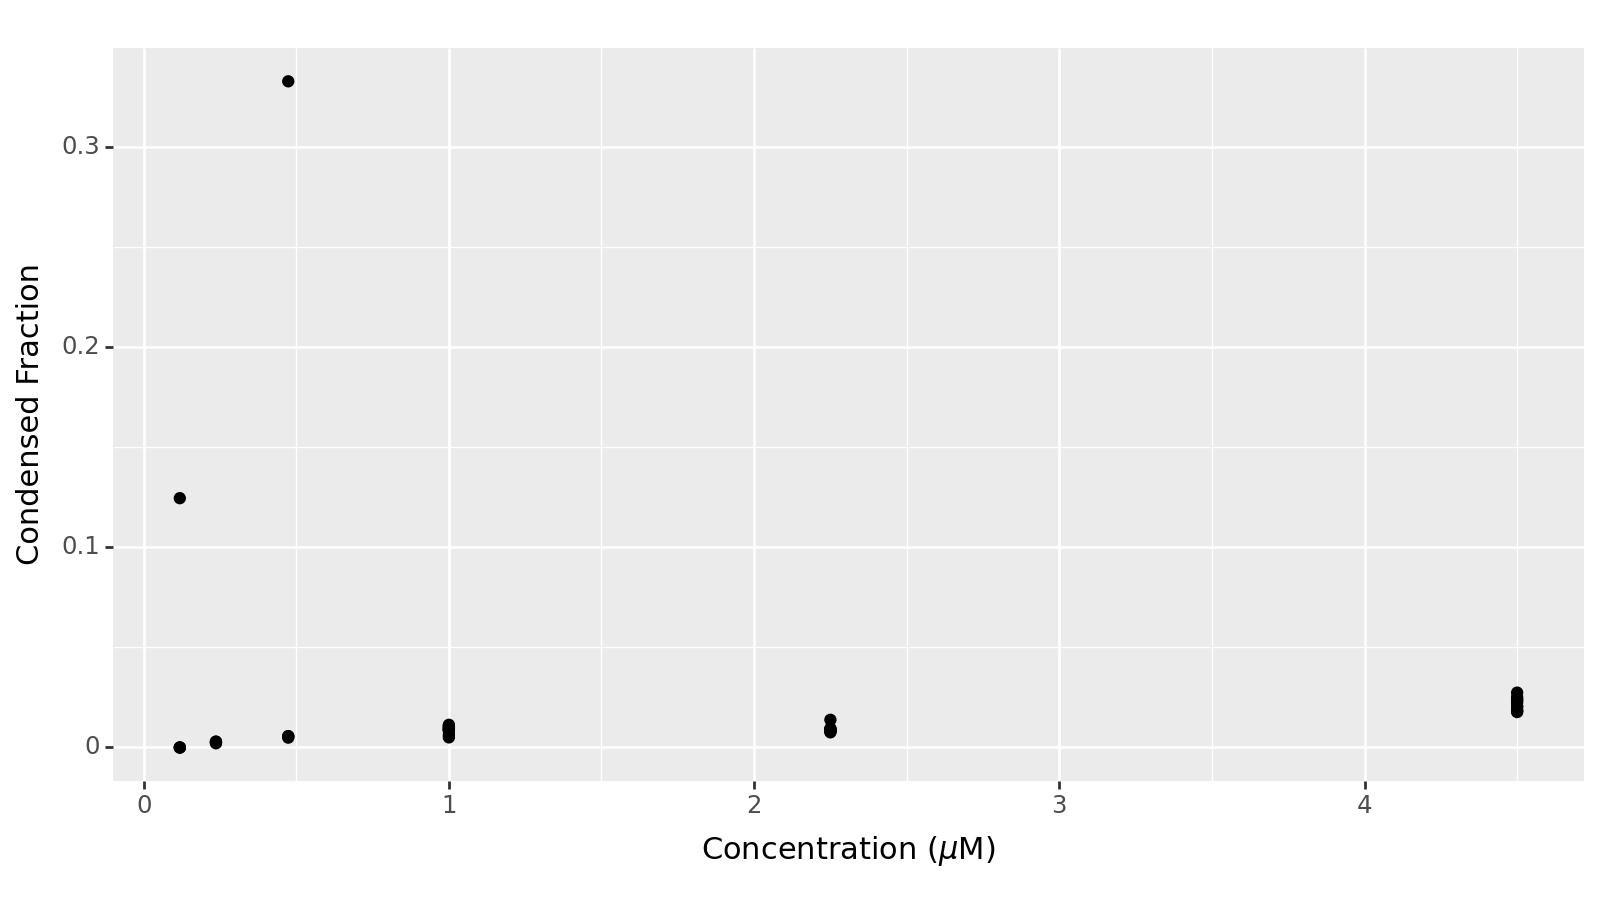

<Figure Size: (800 x 450)>

In [36]:
(
        pn.ggplot(condensed_fractions, pn.aes(x="conc", y="condensed_fraction")) +
        pn.geom_point() +
        # pn.scale_y_log10() +
        pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction") +
        pn.theme(figure_size=(8, 4.5))
)

In [13]:
regions = pd.read_csv("data/regions.csv")

In [14]:
regions

,area,mean_intensity,perimeter,axis_major_length,axis_minor_length,prep,dir_name,image_name
0,4306.0,0.126432,257.722871,75.918439,72.317299,NaN,data,good_condensates
1,278.0,0.100828,84.041631,21.614873,17.718553,NaN,data,good_condensates
2,1.0,0.101667,0.000000,0.000000,0.000000,NaN,data,good_condensates
3,3649.0,0.119873,242.338095,68.765666,67.625421,NaN,data,good_condensates
4,1.0,0.100833,0.000000,0.000000,0.000000,NaN,data,good_condensates
...,...,...,...,...,...,...,...,...
2741,11.0,0.022376,7.621320,4.348458,4.065578,NaN,data,small_condensates
2742,2.0,0.022083,0.000000,2.000000,0.000000,NaN,data,small_condensates
2743,1.0,0.022278,0.000000,0.000000,0.000000,NaN,data,small_condensates
2744,1.0,0.022500,0.000000,0.000000,0.000000,NaN,data,small_condensates


In [4]:
regions["conc"] = 113 / regions["dir_name"]

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [21]:
regions["circularity"] = (np.square(regions["perimeter"])) / (4 * np.pi * regions["area"])

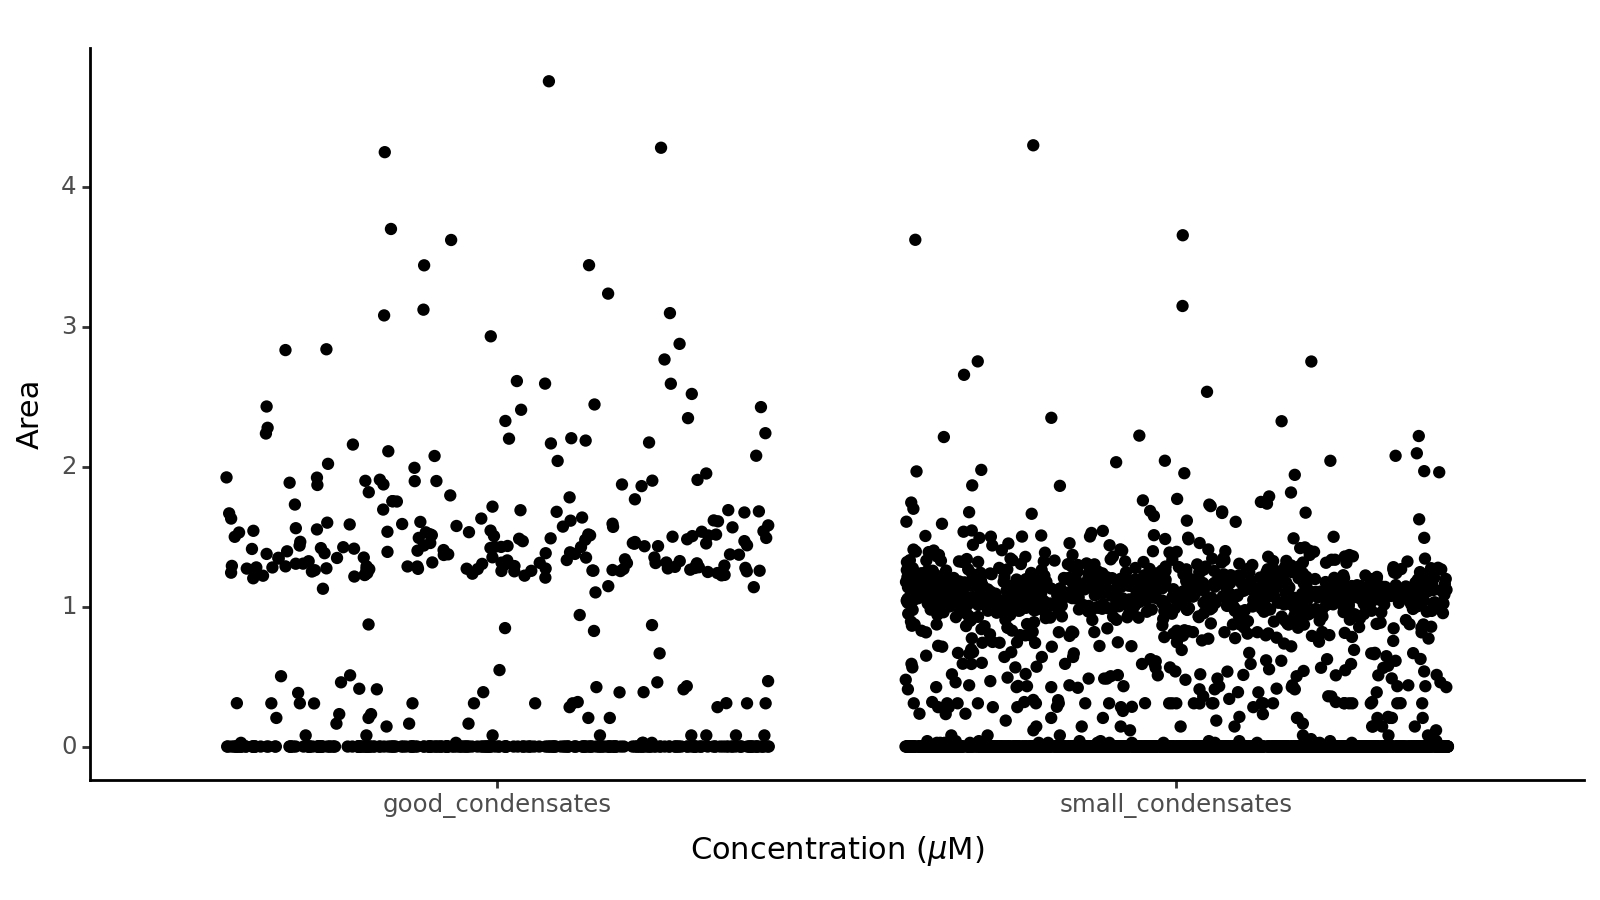

<Figure Size: (800 x 450)>

In [23]:
(
        pn.ggplot(regions, pn.aes(x="image_name", y="circularity"))
        + pn.geom_jitter()
        + pn.labs(x="Concentration ($\mu$M)", y="Area")
        # # Add more ticks on x axis
        # + pn.scale_x_continuous(breaks=[x for x in range(0, 40, 1)])
        + pn.theme_classic()
        + pn.theme(figure_size=(8, 4.5))
)

In [46]:
condensed_fractions["conc"] = 113 / condensed_fractions["dir_name"]
condensed_fractions["log_cf"] = np.log2(condensed_fractions["condensed_fraction"])

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


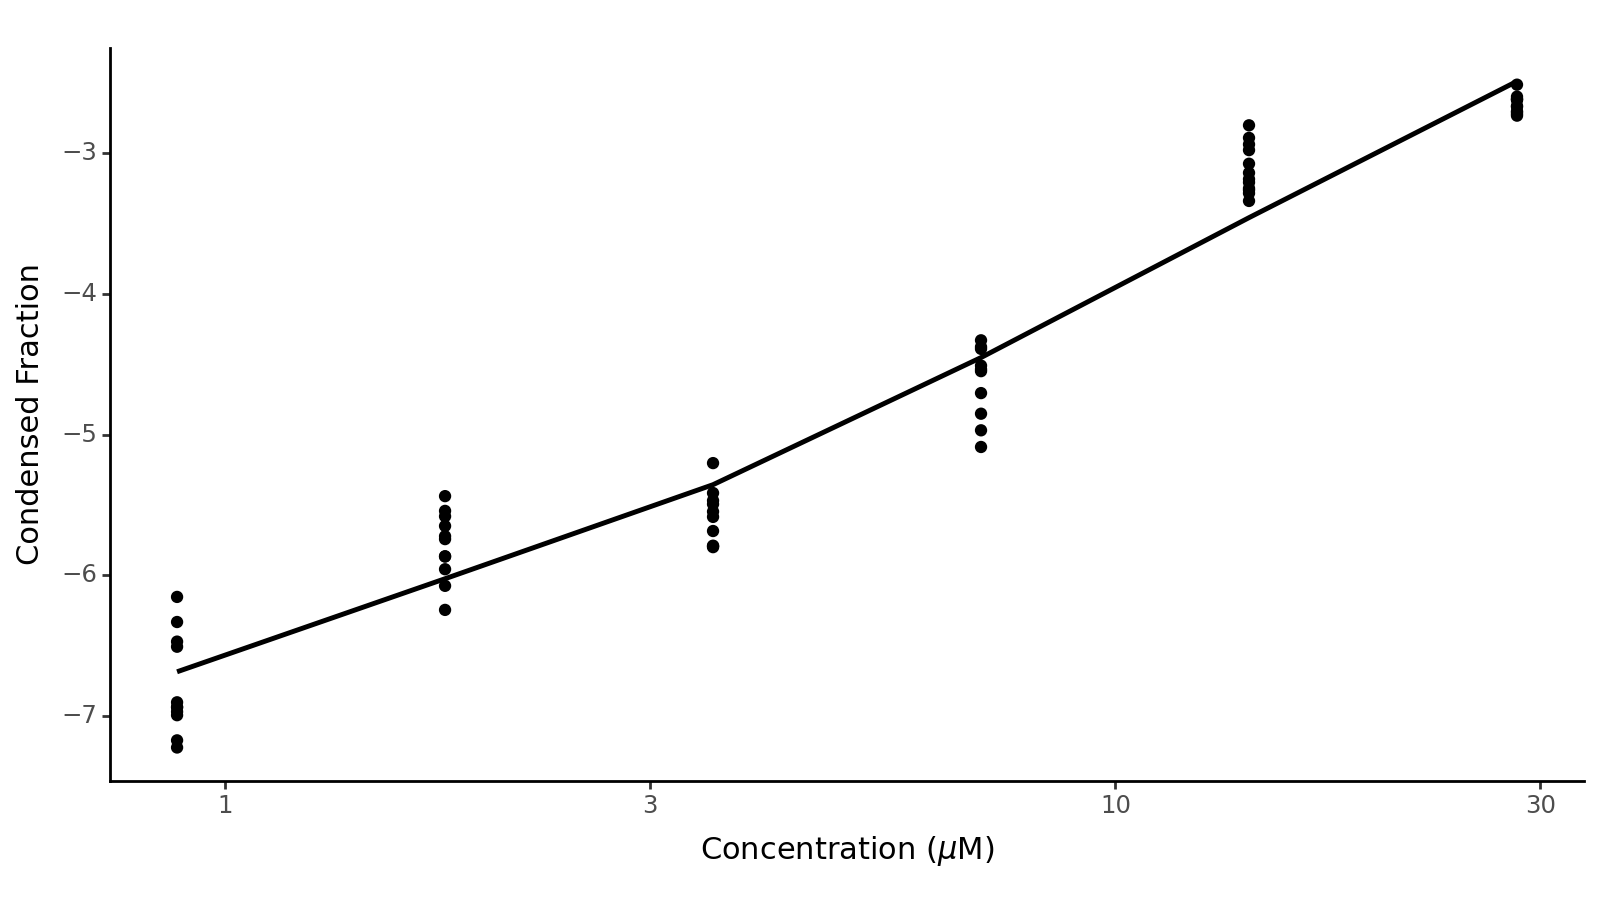

<Figure Size: (800 x 450)>

In [50]:
(
        pn.ggplot(condensed_fractions, pn.aes(x="conc", y="log_cf"))
        + pn.geom_point()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction")
        # Add more ticks on x axis
        + pn.scale_x_log10()
        + pn.theme_classic()
        + pn.theme(figure_size=(8, 4.5))

)